In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [20]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [21]:
%matplotlib inline
np.random.seed(9)

In [22]:
data = pd.read_csv('train.csv')

In [23]:
print(data.shape)

(42000, 785)


In [24]:
# Convert to numpy array and seperate images and labels
data_np = data.values
labels = data_np[:, 0]
images = data_np[:, 1:].reshape(42000, 28, 28)

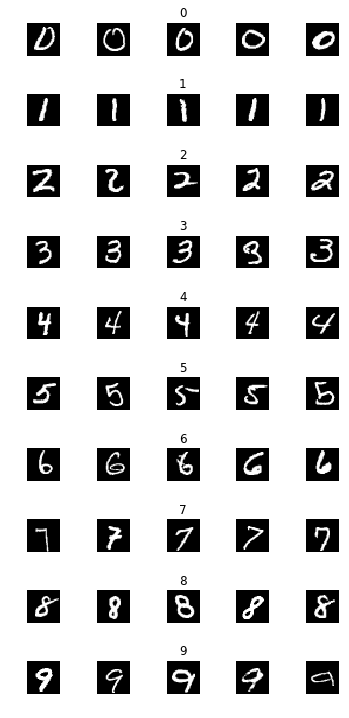

In [25]:
# Plot samples of each digit
# Also get a histogram of data
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 10))
fig.tight_layout()
for i in range(num_classes):
    digit_samples = images[labels==i]
    num_of_samples.append(len(digit_samples))
    for j in range(cols):
        sample_index = np.random.randint(0, len(digit_samples) - 1)
        sample_image = digit_samples[sample_index]
        axs[i][j].imshow(sample_image, cmap=plt.get_cmap('gray'))
        axs[i][j].axis('off')
        if j == 2:
            axs[i][j].set_title(str(i))

[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


Text(0,0.5,'Number of images')

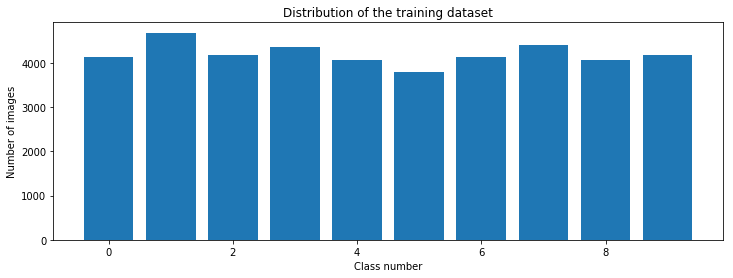

In [26]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel('Class number')
plt.ylabel('Number of images')

In [27]:
# Normalize data
images_normalized = images / 255
images_normalized = images_normalized.reshape(-1, 28, 28, 1)

In [28]:
# Hot encode labels
labels_cat = to_categorical(labels, 10)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(images_normalized, labels_cat, test_size=0.1, random_state=10)


In [30]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                   height_shift_range=0.1,
                   zoom_range=0.2,
                   shear_range=0.1,
                   rotation_range=10)
datagen.fit(X_train)

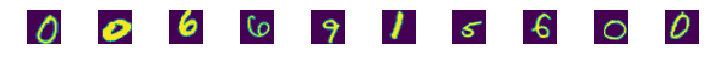

In [31]:
batches = datagen.flow(X_train, y_train, batch_size=10)
X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 10, figsize=(10, 5))
fig.tight_layout()

for i in range(10):
  axs[i].imshow(X_batch[i].reshape(28, 28))
  axs[i].axis('off')

In [32]:
# modified leNet model
def create_model():
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [33]:
classifier = create_model()
print(classifier.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4320)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               432100    
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total para

In [ ]:
result = classifier.fit_generator(datagen.flow(X_train, y_train, batch_size=50), steps_per_epoch=2000, epochs=10, validation_data=(X_val, y_val), shuffle=1)


Epoch 1/10
2000/2000 [==============================] - 76s 38ms/step - loss: 0.4807 - acc: 0.8509 - val_loss: 0.0984 - val_acc: 0.9710
Epoch 2/10
2000/2000 [==============================] - 76s 38ms/step - loss: 0.3183 - acc: 0.9066 - val_loss: 0.0785 - val_acc: 0.9776
Epoch 3/10
2000/2000 [==============================] - 79s 39ms/step - loss: 0.2926 - acc: 0.9152 - val_loss: 0.1012 - val_acc: 0.9726
Epoch 4/10
2000/2000 [==============================] - 72s 36ms/step - loss: 0.2806 - acc: 0.9208 - val_loss: 0.0903 - val_acc: 0.9755
Epoch 5/10
2000/2000 [==============================] - 72s 36ms/step - loss: 0.2736 - acc: 0.9240 - val_loss: 0.1020 - val_acc: 0.9714
Epoch 6/10
 529/2000 [======>.......................] - ETA: 55s - loss: 0.2698 - acc: 0.9243

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')